Importing necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as ppt

Uplodaing data

Downlaod the dataset here: https://www.kaggle.com/yamqwe/us-non-voters-poll-datae

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
filepath = "/content/drive/MyDrive/nonvoters_data.csv"
nonvoter = pd.read_csv(filepath)

Mounted at /content/drive


Taking a look at the data in general

In [ ]:
nonvoter.head()

,RespId,weight,Q1,Q2_1,Q2_2,Q2_3,Q2_4,Q2_5,Q2_6,Q2_7,Q2_8,Q2_9,Q2_10,Q3_1,Q3_2,Q3_3,Q3_4,Q3_5,Q3_6,Q4_1,Q4_2,Q4_3,Q4_4,Q4_5,Q4_6,Q5,Q6,Q7,Q8_1,Q8_2,Q8_3,Q8_4,Q8_5,Q8_6,Q8_7,Q8_8,Q8_9,Q9_1,Q9_2,Q9_3,...,Q21,Q22,Q23,Q24,Q25,Q26,Q27_1,Q27_2,Q27_3,Q27_4,Q27_5,Q27_6,Q28_1,Q28_2,Q28_3,Q28_4,Q28_5,Q28_6,Q28_7,Q28_8,Q29_1,Q29_2,Q29_3,Q29_4,Q29_5,Q29_6,Q29_7,Q29_8,Q29_9,Q29_10,Q30,Q31,Q32,Q33,ppage,educ,race,gender,income_cat,voter_category
0,470001,0.7516,1,1,1,2,4,1,4,2,2,4,2,1,1,4,4,3,2,2,1,2,2,2,2,1,2,1,3,4,2,1,1,1,1,2,4,2,2,4,...,1,NaN,2,1,1,1,1,1,1,1,1,1,1.0,1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,1.0,NaN,73,College,White,Female,$75-125k,always
1,470002,1.0267,1,1,2,2,3,1,1,2,1,1,3,3,3,4,3,3,2,2,2,2,3,3,1,1,2,2,2,3,2,2,2,2,3,2,2,1,1,3,...,1,NaN,1,3,3,1,1,1,1,1,1,1,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,1.0,90,College,White,Female,$125k or more,always
2,470003,1.0844,1,1,1,2,2,1,1,2,1,4,3,2,2,3,3,2,2,2,2,3,3,2,3,1,1,1,3,2,1,1,2,2,2,2,1,1,2,4,...,1,NaN,2,1,2,1,1,1,1,1,1,1,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,2.0,NaN,53,College,White,Male,$125k or more,sporadic
3,470007,0.6817,1,1,1,1,3,1,1,1,1,1,2,1,1,4,4,2,1,1,2,2,2,2,2,1,3,1,3,2,2,2,2,2,2,2,2,1,2,4,...,1,NaN,2,1,2,1,1,1,1,1,1,1,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,1.0,NaN,58,Some college,Black,Female,$40-75k,sporadic
4,480008,0.9910,1,1,1,-1,1,1,1,1,1,1,1,4,-1,1,1,2,4,1,1,1,1,1,1,1,2,2,1,3,2,3,3,3,4,2,2,1,4,3,...,1,NaN,1,3,1,1,1,1,1,1,1,1,1.0,1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,-1.0,NaN,NaN,81,High school or less,White,Male,$40-75k,always


Kaggle specified this as 'non voter' data but I see below that it includes general voter data in categories of people who vote sporadically, always, or rarely/never. I think this could be a good categorical variable to compare demographics around

In [ ]:
nonvoter['voter_category'].value_counts()

sporadic        2574
always          1811
rarely/never    1451
Name: voter_category, dtype: int64

I find from the code below that the column lenghts are all not the same, meaning we may have na values

In [ ]:
nonvoter.count().unique()

array([5836,  486, 5302, 1342, 1592, 2002, 2242])

Confirming existance of na values

In [ ]:
nonvoter.isnull().sum().to_dict()

{'Q1': 0,
 'Q10_1': 0,
 'Q10_2': 0,
 'Q10_3': 0,
 'Q10_4': 0,
 'Q11_1': 0,
 'Q11_2': 0,
 'Q11_3': 0,
 'Q11_4': 0,
 'Q11_5': 0,
 'Q11_6': 0,
 'Q14': 0,
 'Q15': 0,
 'Q16': 0,
 'Q17_1': 0,
 'Q17_2': 0,
 'Q17_3': 0,
 'Q17_4': 0,
 'Q18_1': 0,
 'Q18_10': 0,
 'Q18_2': 0,
 'Q18_3': 0,
 'Q18_4': 0,
 'Q18_5': 0,
 'Q18_6': 0,
 'Q18_7': 0,
 'Q18_8': 0,
 'Q18_9': 0,
 'Q19_1': 0,
 'Q19_10': 0,
 'Q19_2': 0,
 'Q19_3': 0,
 'Q19_4': 0,
 'Q19_5': 0,
 'Q19_6': 0,
 'Q19_7': 0,
 'Q19_8': 0,
 'Q19_9': 0,
 'Q20': 0,
 'Q21': 0,
 'Q22': 5350,
 'Q23': 0,
 'Q24': 0,
 'Q25': 0,
 'Q26': 0,
 'Q27_1': 0,
 'Q27_2': 0,
 'Q27_3': 0,
 'Q27_4': 0,
 'Q27_5': 0,
 'Q27_6': 0,
 'Q28_1': 534,
 'Q28_2': 534,
 'Q28_3': 534,
 'Q28_4': 534,
 'Q28_5': 534,
 'Q28_6': 534,
 'Q28_7': 534,
 'Q28_8': 534,
 'Q29_1': 4494,
 'Q29_10': 4494,
 'Q29_2': 4494,
 'Q29_3': 4494,
 'Q29_4': 4494,
 'Q29_5': 4494,
 'Q29_6': 4494,
 'Q29_7': 4494,
 'Q29_8': 4494,
 'Q29_9': 4494,
 'Q2_1': 0,
 'Q2_10': 0,
 'Q2_2': 0,
 'Q2_3': 0,
 'Q2_4': 0,
 'Q2_5': 0,
 

Through some EDA and looking through the codebook of this data, I find that the reason for many NaN values is due to the nature of questions being asked, such as if you answered yes in question _x_ what is the reason for doing so in question _y_. Thus the people who vote no in question _x_ will leave _y_ blank. I will continue on with my analysis leaving the NaN intact as my analysis will ensure only relevant questions are analyzed with each other. Moreover, there are no Na vlaues in main categories such as gender, income, race.

In [ ]:
nonvoter['gender'].unique()

array(['Female', 'Male'], dtype=object)

Is there some difference in gender for people of different voter categories?

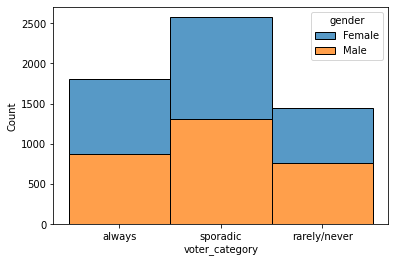

In [ ]:
 sns.histplot(x="voter_category", data=nonvoter, hue='gender', multiple="stack")

Looking at the histogram, there is does not seem to be any drastic gender differences for the three different voter categories.

What about race?

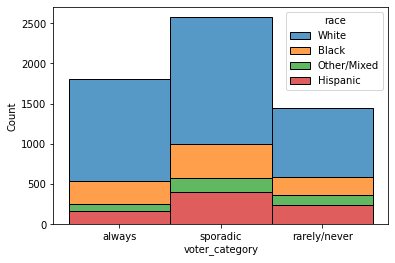

In [ ]:
 sns.histplot(x="voter_category", data=nonvoter, hue='race', multiple="stack")

Here we find that race is not as evenly distributed as gender was. Majority of respondants in this case are white but there is some other representation of black, hispanic, and other races

What about income?

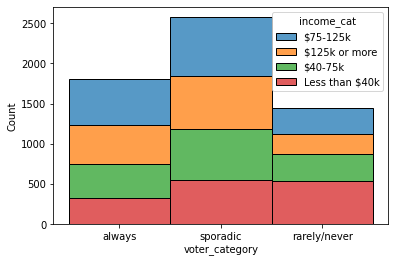

In [ ]:
 sns.histplot(x="voter_category", data=nonvoter, hue='income_cat', multiple="stack")

We find from this visualization that again nothing stands out as being overrepresented in terms of income categories. However, notice that in those who 'always' vote, blue and yellow (higher income) is more represented compared to red (low income). Also notice that in those who 'rarely/never' vote the results are opposite where there are more people who are low income compared to high income. Sporadic voters seems to be the most evenly distributed. I think this shows something very interesting on how income plays into voting. There seems to be a linear releatationship of sorts where if you vote, you may be likeley to have a higher income compared to those who don't vote. Good for additional analysis.

What about education?

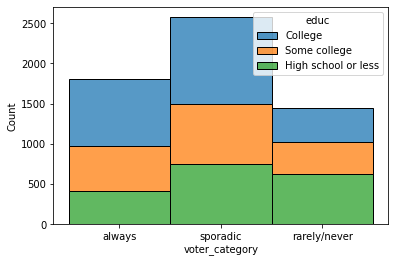

In [ ]:
 sns.histplot(x="voter_category", data=nonvoter, hue='educ', multiple="stack")

Similar to income, we find that people who always vote have more college education compared to those who never/rarely vote having high school or less education. Sporadic voting seems to also have an even spread of education levels which is interesting.

Given that the distribution for education and income was similar across the two histograms, is there a association between education and income?

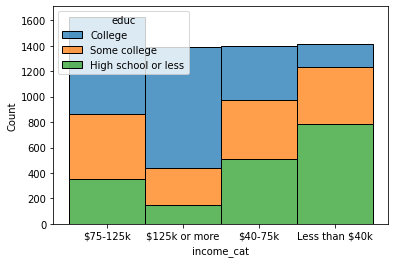

In [ ]:
 sns.histplot(x="income_cat", data=nonvoter, hue='educ', multiple="stack")

Looks like we see that there is indeed an association between income and education where there is a much larger distribution of people with high school or less education earning less than 40k compared to those with a college education mainly earning more than 125k

My next question: Do Americans believe it is important to vote in order to be a good citizen of America?

In [ ]:
nonvoter['Q2_1'].value_counts()

 1    4758
 2     738
 4     160
 3     145
-1      35
Name: Q2_1, dtype: int64

Looking at value counts, 1 is very important, which seems that regardless of voter categories many people do consider voting to be very important.

All of question 3 variables focus on race in America and considering we found above that the majority of the population is white, I think it will be interesting to see racial sentiments across the united states. Since there are multiple questions across this variable, I am going to add up all the responses together to create one racial column where lower numbers mean people do care about racial equality. Q3_3 will be excluded as its answers are opposite in sentiment.

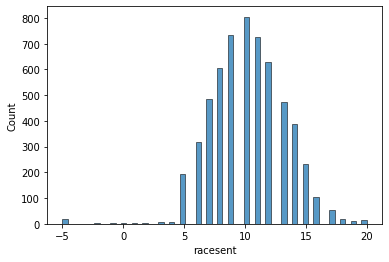

In [ ]:
nonvoter['racesent'] = nonvoter['Q3_1'] + nonvoter['Q3_2'] + nonvoter['Q3_4'] + nonvoter['Q3_5'] + nonvoter['Q3_6']
nonvoter['racesent'].value_counts()
sns.histplot(x="racesent", data=nonvoter)

For me, this independent project is about trial and error, I think a graph like this is hard to interpret given answers range from values of 1-4. Since we are concatenating 5 questions, 5 would mean that people strongly think race is an issue in America - racism for example. Thus, an answer of 20 would mean people strongly don't find racism/race as something to be dealt with. Given this info, it seems we get a normal curve with most people ranging around the middle of 5 and 20 (with some clear outliers probably due to missing values being inputted as -1 rather than nan).

Given the above graph wasn't the most clear for me, I think individual histograms per question may be more important and clear

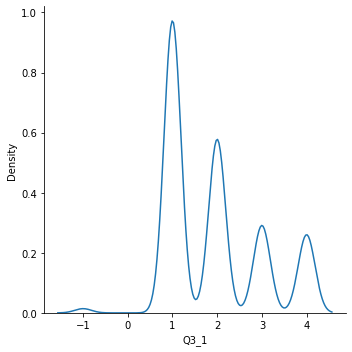

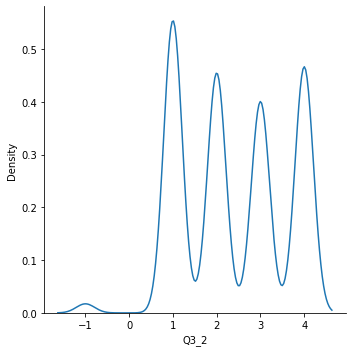

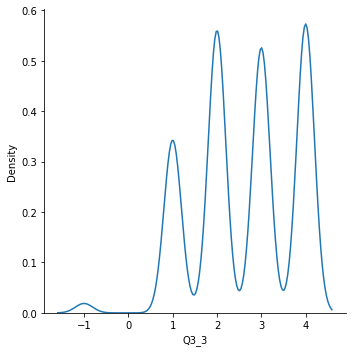

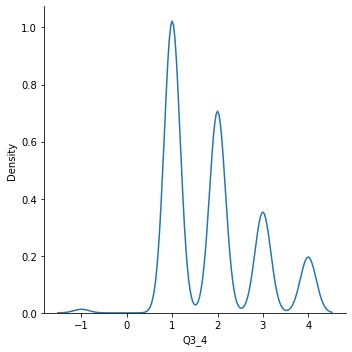

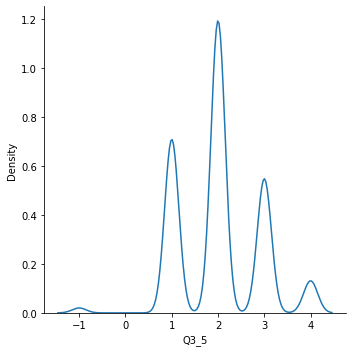

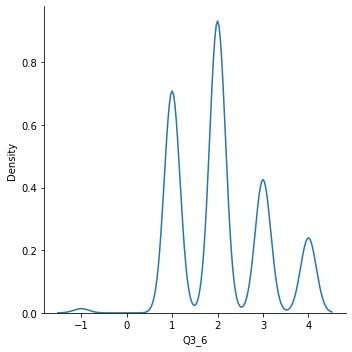

In [ ]:
sns.displot(nonvoter, x="Q3_1", kind="kde")
sns.displot(nonvoter, x="Q3_2", kind="kde")
sns.displot(nonvoter, x="Q3_3", kind="kde")
sns.displot(nonvoter, x="Q3_4", kind="kde")
sns.displot(nonvoter, x="Q3_5", kind="kde")
sns.displot(nonvoter, x="Q3_6", kind="kde")



From these KDE's we find more interesting results.
Question 1 asks if systematic racism is a problem in the US and we find that most people stated '1' that they strongly agree. It is good to see such a sentiment across the white demographic
Question 2 asks if systematic racism is a bigger problem than violance and vandalism in police and we find that the majority answered 1 but other values are also reaching high up so results seem to be inconclusive towards one strong sentiment.
Quesiton 3 asks if society has become soft and feminine and it is good to find that most people do tend to disagree with such a statement.
Quesiton 4 finds that most people do think media cares more about money than telling the truth.
Question 5 revolves around agreeing somewhat in that traditional parties don't care about people like me. I think seeing somewhat agree on this is interesting since white people are the most represented. Maybe education or income demographics are coming into play here.
Finally, question 6 asks if people need to change the way they talk with the times and again people somewhat agree. It would be interesting to research what changes people think need to be made specifically.



